In [1]:
!pip install pandas scikit-learn matplotlib tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime
from google.colab import files

In [3]:
uploaded = files.upload()
df = pd.read_csv('AAPL.csv', index_col=0)

In [4]:
# Step 4: Preprocess the data
df = df.rename(columns={'Close(t)': 'Close'})  # Renaming column for consistency
df['Date'] = pd.to_datetime(df.index)  # Ensure 'Date' is in datetime format


In [5]:
df.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast,Date
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45,2005-10-17
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78,2005-10-18
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93,2005-10-19
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87,2005-10-20
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01,2005-10-21


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [7]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Sequence of previous `time_step` days' prices
        y.append(data[i, 0])  # The next day's price
    return np.array(X), np.array(y)


In [8]:
time_step = 60  # Using the last 60 days to predict the next day's stock price
X, y = create_dataset(scaled_data, time_step)

In [9]:
# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


In [11]:
model = Sequential()


In [12]:
# LSTM layer with 50 units and dropout for regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer for predicting stock price

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Step 9: Train the model with a large number of epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 6.5129e-05 - val_loss: 0.0027
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 6.1199e-05 - val_loss: 0.0014
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 6.1651e-05 - val_loss: 0.0019
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 5.3540e-05 - val_loss: 0.0011
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 5.4448e-05 - val_loss: 0.0011
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 5.1565e-05 - val_loss: 7.4199e-04
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.4863e-05 - val_loss: 7.0268e-04
Epoch 9/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 4.5671e-05 - val_loss: 0.0018
Epoch 10/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 3.9280e-05 - val_loss: 0.0013
Epoch 11/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 3.9445e-05 - va

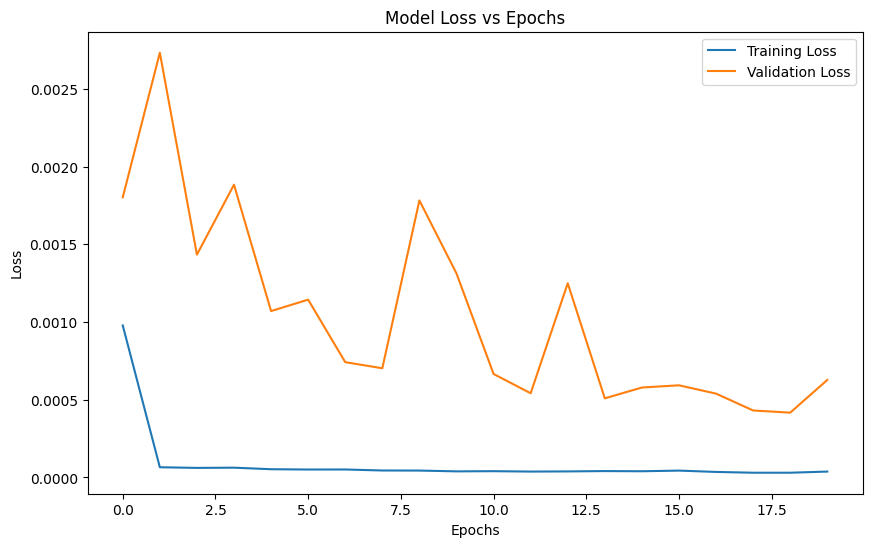

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse scale to get original prices
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


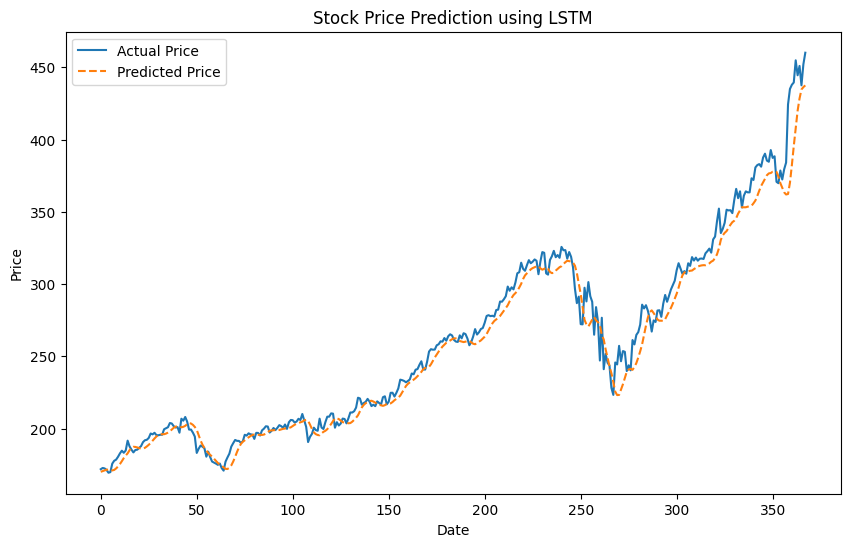

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price', linestyle='--')
plt.legend()
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
# Step 12: Predict the next 7 days stock prices
def predict_next_7_days(date_input):
    # Convert input date to datetime object
    input_date = pd.to_datetime(date_input)

    # Get the latest data from the input date
    last_data = df[df['Date'] <= input_date].iloc[-time_step:]  # Last `time_step` days' data
    if last_data.empty:
        return "Date not found in the dataset."

    # Scale the data
    last_scaled_data = scaler.transform(last_data[['Close']].values)

    # Prepare the input for prediction (reshape for LSTM input)
    last_scaled_data = last_scaled_data.reshape(1, time_step, 1)

    # Predict the next 7 days
    future_predictions = []
    for i in range(7):
        future_price = model.predict(last_scaled_data)
        future_predictions.append(future_price[0][0])

        # Update the input for the next prediction (add the predicted value)
        next_scaled_value = scaler.transform([[future_price[0][0]]])
        last_scaled_data = np.append(last_scaled_data[:, 1:, :], next_scaled_value.reshape(1, 1, 1), axis=1)

    # Inverse scale the predictions
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Create a DataFrame to display predicted prices
    future_dates = pd.date_range(start=input_date, periods=8, freq='D')[1:]  # Next 7 days
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted Price': future_predictions.flatten()
    })

    return future_df

# Step 13: Example usage: Predict the next 7 days from a given date
date_input = '2024-04-27'  # Replace with any date you want to input
predicted_prices = predict_next_7_days(date_input)
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
        Date  Predicted Price
0 2024-04-28       439.102234
1 2024-04-29       368.689270
2 2024-04-30       273.935303
3 2024-05-01       178.168335
4 2024-05-02        95.915154
5 2024-05-03        33.351353
6 2024-05-04        -9.695108


In [23]:
# Step 1: Import necessary libraries for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 2: Calculate MSE, RMSE, and MAE on the test set

# Predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse scale the predicted and actual values to get original prices
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 3: Calculate evaluation metrics
mse = mean_squared_error(y_test_actual, predicted_prices)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_actual, predicted_prices)  # Mean Absolute Error

# Step 4: Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Squared Error (MSE): 129.2395
Root Mean Squared Error (RMSE): 11.3684
Mean Absolute Error (MAE): 7.8117


In [1]:
!pip install flask flask-ngrok
